In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [9]:
df = pd.read_table("ICPSR_35478/DS0001/35478-0001-Data.tsv")
df.head()

,YEAR,ID,INTID,FEEUSED,FEELEVEL,DATEINTV,LNGTHINV,INTAGE,INTETHN,MODE,...,SAMPCODE,SAMPLE,OVERSAMP,WTSS,WTSSNR,WTSSALL,WTCOMB,WTCOMBNR,VSTRAT,VPSU
0,2012,1,49,1,75,721,69,60,1,1,...,601,10,1,2.621963,2.869532,2.621963,6.402159,7.006659,-1,-1
1,2012,2,150,1,75,624,53,32,1,1,...,601,10,1,3.495950,3.826043,3.495950,6.514477,7.129583,-1,-1
2,2012,3,150,1,75,627,77,32,1,1,...,601,10,1,1.747975,1.913021,1.747975,1.671130,1.828920,-1,-1
3,2012,4,49,1,20,527,78,60,1,1,...,601,10,1,1.235694,1.352370,1.235694,1.181370,1.292917,-1,-1
4,2012,5,235,1,75,620,149,62,1,1,...,601,10,1,0.873988,0.956511,0.873988,0.835565,0.914460,-1,-1


In [10]:
columns = ['YEAR', 'ID', 'AGE',
    'GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM', 'SELFLESS', 'ACCPTOTH', 'OTHSHELP', 
    'CARESELF', 'PEOPTRBL', 'SELFFRST', 'VOLMONTH', 
    'MAWRKSLF', 'MAOCC10', 'MAIND10',
    'SIBS', 'CHILDS',
    'PAOCC10', 'PAWRKSLF', 'PAIND10', 
    'RINCOME', 'RINCOM06', 'REALRINC']
df_int = df[columns]

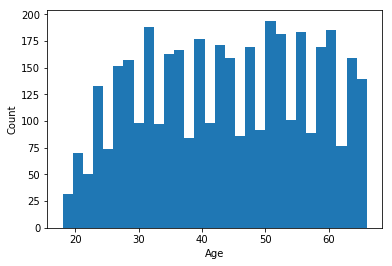

In [24]:
plt.hist(df_int['AGE'],bins=30)
plt.ylabel("Count")
plt.xlabel("Age")

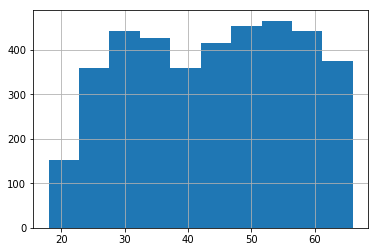

In [42]:
df_int['AGE'].hist();

In [12]:
df_int = df_int[(df_int['AGE'] >= 18) & (df_int['AGE'] <= 66)]
age_bins = pd.cut(df_int['AGE'],
                  [18, 26, 34, 42, 50, 58, 66], 
                  include_lowest=True)
df_int = df_int.assign(AGEBIN = age_bins)

In [30]:
df_int[actions_cols].apply(lambda x: , axis=1).head()

,GIVBLOOD,GIVHMLSS,RETCHNGE,CUTAHEAD,VOLCHRTY,GIVCHRTY,GIVSEAT,HELPAWAY,CARRIED,DIRECTNS,LOANITEM
0,6,5,5,5,7,6,6,6,7,6,7
1,7,6,6,7,7,5,7,5,6,6,7
2,7,7,6,5,7,7,6,7,6,5,6
3,1,1,1,1,1,1,1,1,1,1,1
5,7,4,7,4,7,5,7,6,7,4,5


In [32]:
actions_cols = ['GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM']

# TODO Shorten by an apply.
df_int['present'] = df_int[actions_cols].apply(lambda x: (x >= 1) & (x <= 6)).apply(lambda x: x.all(), axis=1)

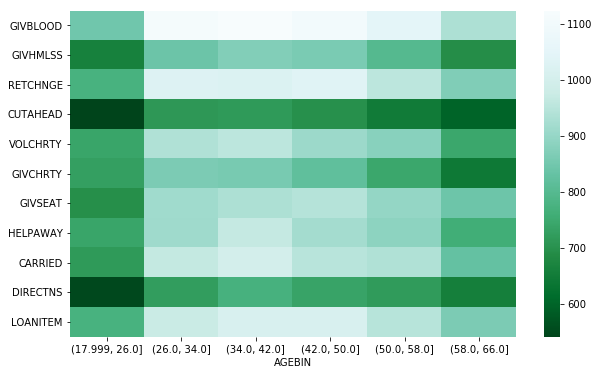

In [41]:
df_actions = df_int[df_int['present']]
actions_cols = ['AGEBIN', 'GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM']
plt.figure(figsize=(10,6))
sns.heatmap(df_actions[actions_cols].groupby('AGEBIN').sum().transpose(), cmap="BuGn_r"); 

Self-employed 1
Someone else 2

Strongly agree 1
Agree 2
Neither agree nor disagree 3
Disagree 4
Strongly disagree 5

MAWRKSLF
PAWRKSLF

OTHSHELP - PEOPLE SHOULD HELP LESS FORTUNATE OTHERS 
CARESELF - THOSE IN NEED HAVE TO TAKE CARE OF THEMSELVES 

In [43]:
values_cols = ['OTHSHELP', 'CARESELF']

df_int = df_int.assign(values_present=df_int[values_cols].apply(lambda x: (x >= 1) & (x <= 5)).apply(lambda x: x.all(), axis=1))

parent_work = ['MAWRKSLF', 'PAWRKSLF']
df_int = df_int.assign(work_self_present=df_int[parent_work].apply(lambda x: (x >= 1) & (x <= 2)).apply(lambda x: x.all(), axis=1))
df_values = df_int[df_int['work_self_present'] & df_int['values_present']]

In [44]:
df_values = df_values.assign(both_pa_wrk=df_values['MAWRKSLF'] + df_values['PAWRKSLF'])
df_values.head()['both_pa_wrk']

5     4
9     4
13    4
15    4
21    4
Name: both_pa_wrk, dtype: int64

In [17]:
df_values[['MAWRKSLF', 'PAWRKSLF', 'OTHSHELP', 'CARESELF', 'both_pa_wrk']].apply(lambda x: x.value_counts())

,MAWRKSLF,PAWRKSLF,OTHSHELP,CARESELF,both_pa_wrk
1,79.0,130.0,236,68,NaN
2,541.0,490.0,333,265,30.0
3,NaN,NaN,44,165,149.0
4,NaN,NaN,6,110,441.0
5,NaN,NaN,1,12,NaN


In [18]:
df_values.groupby('both_pa_wrk').mean()[['CARESELF', 'OTHSHELP']]

,CARESELF,OTHSHELP
both_pa_wrk,,
2,2.533333,1.633333
3,2.563758,1.657718
4,2.573696,1.739229


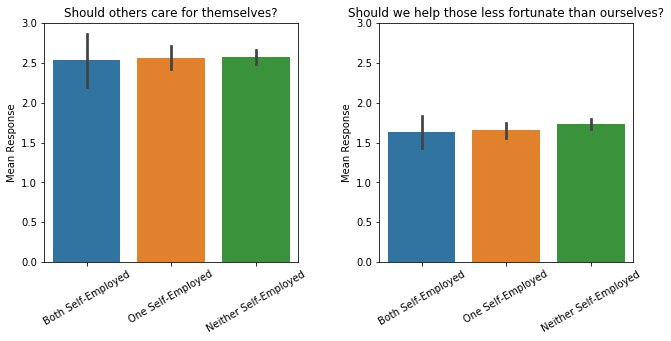

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.tight_layout(pad=5)

labels = ["Both Self-Employed", "One Self-Employed", "Neither Self-Employed"]

plt.subplot(1,2,1)
bar_1 = sns.barplot(x="both_pa_wrk", y="CARESELF", data=df_values) \
   .set_title("Should others care for themselves?")
bar_1.axes.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.ylabel("Mean Response")
plt.xlabel("")
plt.ylim(0,3)
plt.subplot(1,2,2)
bar_2 = sns.barplot(x="both_pa_wrk", y="OTHSHELP", data=df_values) \
   .set_title("Should we help those less fortunate than ourselves?")
bar_2.axes.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.ylabel("Mean Response")
plt.xlabel("")
plt.ylim(0,3);

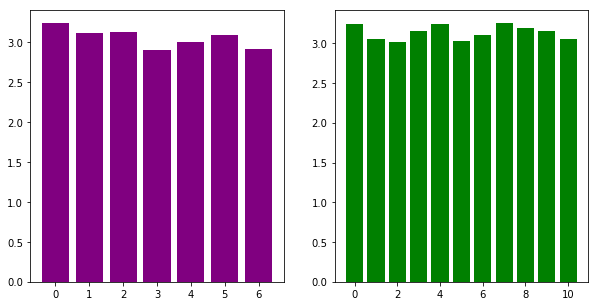

In [49]:
rows_accptoth = df_int[(df_int['ACCPTOTH'] >= 1) & (df_int['ACCPTOTH'] <= 6)]
rows_accptoth['ACCPTOTH'].value_counts().sort_index()
rows_accptoth_sibs = rows_accptoth[(rows_accptoth['SIBS'] <= 10)]

means_childs_accpt = rows_accptoth_sibs.groupby('CHILDS').mean()['ACCPTOTH'][[0,1,2,3,4,5,6]]
means_sibs_accpt = rows_accptoth_sibs.groupby('SIBS').mean()['ACCPTOTH']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(means_childs_accpt.index, means_childs_accpt.values, color='purple')
plt.ylabel('')
plt.title('')

plt.subplot(1, 2, 2)
plt.bar(means_sibs_accpt.index, means_sibs_accpt.values, color='green')
plt.ylabel('')
plt.title('')
plt.show()

In [51]:
means_accpt = rows_accptoth_sibs.groupby(['CHILDS', 'SIBS'])['ACCPTOTH'].mean()
means_accpt

# Tall format

CHILDS  SIBS
0       0       3.038462
        1       3.261364
        2       3.164557
        3       3.420000
        4       3.653846
        5       3.066667
        6       2.928571
        7       3.142857
        8       2.800000
        9       2.666667
1       0       4.250000
        1       3.156250
        2       2.805556
        3       3.000000
        4       3.142857
        5       3.000000
        6       2.666667
        7       3.666667
        8       3.571429
        9       4.000000
        10      3.000000
2       0       3.416667
        1       2.888889
        2       3.160000
        3       2.913043
        4       3.435897
        5       2.869565
        6       3.181818
        7       3.538462
        8       3.142857
                  ...   
4       5       2.285714
        6       3.181818
        7       2.666667
        8       3.500000
        9       4.500000
        10      2.000000
5       1       2.000000
        2       3.000000
        3   

In [52]:
means_accpt.unstack('SIBS')

# Wide format

SIBS,0,1,2,3,4,5,6,7,8,9,10
CHILDS,,,,,,,,,,,
0,3.038462,3.261364,3.164557,3.420000,3.653846,3.066667,2.928571,3.142857,2.800000,2.666667,NaN
1,4.250000,3.156250,2.805556,3.000000,3.142857,3.000000,2.666667,3.666667,3.571429,4.000000,3.000000
2,3.416667,2.888889,3.160000,2.913043,3.435897,2.869565,3.181818,3.538462,3.142857,2.714286,4.333333
3,2.800000,2.375000,2.750000,3.333333,2.700000,3.333333,3.400000,2.444444,3.333333,3.333333,1.800000
4,3.400000,3.400000,2.615385,3.076923,3.166667,2.285714,3.181818,2.666667,3.500000,4.500000,2.000000
5,NaN,2.000000,3.000000,2.333333,2.333333,3.750000,3.000000,5.000000,4.000000,NaN,3.333333
6,4.000000,NaN,3.000000,NaN,4.000000,3.500000,NaN,3.000000,1.500000,3.000000,2.000000
7,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN,NaN,NaN,3.000000,NaN
8,NaN,NaN,2.000000,3.500000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN


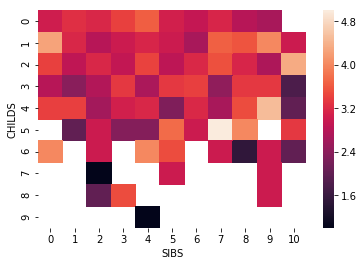

In [53]:
sns.heatmap(means_accpt.unstack('SIBS'))

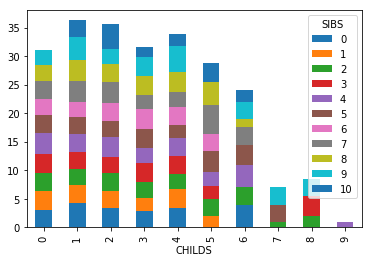

In [54]:
unstack_sibs = means_accpt.unstack('SIBS')
unstack_sibs.plot.bar(stacked=True);

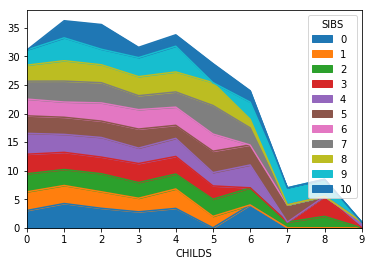

In [55]:
unstack_sibs.plot.area();